#### This notebook contains unused code, failed code or rough work from the the sorting_algorithms.ipynb project. 

In [7]:
import numpy as np # For randomly generating numbers
import pandas as pd #For reading csv files, generating dataframes and plots for same
import time

In [8]:
def rand(n):
    array = []
    for i in range(0, n, 1): # for every integer between 1 and n
        gen_rand= np.random.randint(0, 100) # generate a random number
        array.append(gen_rand) # and add it to the array
    return array

In [18]:
#Input an array with 100 values
#Returns the mean of every 10 values, as an array
def mean_array(the_array):
    average_time = []
    y1 = np.mean(the_array[slice(0, 10, 1)])
    y2 = np.mean(the_array[slice(10, 20, 1)])
    y3 = np.mean(the_array[slice(20, 30, 1)])
    y4 = np.mean(the_array[slice(30, 40, 1)])
    y5 = np.mean(the_array[slice(40, 50, 1)])
    y6 = np.mean(the_array[slice(50, 60, 1)])
    y7 = np.mean(the_array[slice(60, 70, 1)])
    y8 = np.mean(the_array[slice(70, 80, 1)])
    y9 = np.mean(the_array[slice(80, 90, 1)])
    y10 =np.mean(the_array[slice(90, 100, 1)])
    
    results = [y1, y2, y3, y4, y5, y6, y7, y8, y9, y10]
    return results

In [9]:
# Passes multiple randomly generated arrays to only 1 function
# Helpful little function that I used to verify results when writing compare_all ()

def bench(func):
    array_1 = []
    array_2 =[]
    # Rand_size = input size of randomly generated datasets
    rand_size = [10, 50, 100, 250, 500, 750, 1000, 5000, 7500, 10000]
    for i in rand_size:
            start = time.time()
            func(rand(i)) #Pass each randomly generated dataset through the function
            end = time.time()
            y = round(((end - start)*1000), 3)
            x = i #Set x equal to the size
            array_1.append(x) #Add x values to array 1 
            array_2.append(y) #Add y values to array 2
         
    d = {'Input Size': array_1, 'Time Elapsed': array_2} #Generate df with data
    df2 = pd.DataFrame(data=d);
    graph = df2.plot('Input Size', 'Time Elapsed');
    display(df2, graph);

## Failed Timsort Implementation


In [10]:
#Ran benchmarking function with timsort and sorted only, following timsorts failure in bench_ten_runs
def bench_tim():
    results=[]
    average_time = []
    final_array= []
    num_runs = 10
    rand_size = [10, 50, 100, 250, 300, 500, 750, 1000, 1500, 2000] #Note the smaller input sizes
    func = [timSort, sorted]
    
    for tim in func: # for my timsort algorithms
        for i in rand_size: #input a value
            size = rand(i) 
            for r in range(num_runs):#ten times
                start = time.time()
                tim(size) 
                end = time.time()
                clock = (end - start)*1000
                results.append(clock)  # Add time elapsed to array results
        average_time = mean_array(results) # Find average time, for each i in rand_size, using mean_array()
        average_time = np.round(average_time, 3) # Round result to 3 dps
        final_array.append(average_time) # Append to final_array
        average_time = [] #set both average_time
        results=[]  #and results to [], before passing through the next function

    df5 = pd.DataFrame({'Input': rand_size, 'TimSort': final_array[0], 'Sorted': final_array[1]})
    df5.to_csv("data/run_tim.csv", index=False)

In [15]:
#Takes a new item, and return the appropriate index for item in sorted array

def binary_search(the_array, item, start, end): #Input is a sorted array, item to be place in array, start and end
    
    if start == end: # if there's only one item in the sorted array
        if the_array[start] > item: # and start item is bigger than the new item
            return start #return start (so the smaller number has index 0)
        else:
            return start + 1 #otherwise return start+1 (so the bigger number has index 1)
        
    if start > end: #at the last element of the array
        return start #return the index of the last element

    mid = round((start + end)/ 2) #Returns the mean of the range of indices 
    
    # determine which side to search
    if the_array[mid] < item: # if new item is less than the middle value
        return binary_search(the_array, item, mid + 1, end) # search array of indices above mid

    elif the_array[mid] > item:
        return binary_search(the_array, item, start, mid - 1) # search array of indices below mid

    else:
        return mid # Otherwise mid = item, so return mid

def insertionSort(the_array):
        
    l = len(the_array) #set l to the number of values in array
    for index in range(1, l): #for every index
        value = the_array[index] #value is equal to element in that position
        pos = binary_search(the_array, value, 0, index - 1) #perform binary search to find the appropriate index for value
        the_array = the_array[:pos] + [value] + the_array[pos:index] + the_array[index+1:]
    return the_array

#Reference:http://interactivepython.org/courselib/static/pythonds/SortSearch/TheInsertionSort.html, accessed 13th April 2019.
#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

Timsort is a hybrid stable sorting algorithm, using elements of both merge sort and insertion sort. It is designed to find short lists within the input that are already ordered. 

While I will be able to apply the binary search and insertion sorts algorithms already discussed in this project. I will use a variation of merge sort, different from the function previously encountered. Merge() is a function that takes two already sorted lists of numbers and puts them in order. This is different from mergeSort, which takes an unordered set and divides it into smaller subsets before merging. With TimSort, the subsets or runs, have already been ordered using Insertion Sort. 

In [11]:
def merge(left, right):

    if not left:
        return right
    if not right:
        return left
    if left[0] < right[0]:
        return [left[0]] + merge(left[1:], right)
    return [right[0]] + merge(left, right[1:])


In [12]:
def timSort(the_array):
 
    runs, sorted_runs = [], []
    length = len(the_array)
    new_run = [the_array[0]]

    # for every i in the range of 1 to length of array
    for i in range(1, length):
        # if i is at the end of the list
        if i == length - 1:
            new_run.append(the_array[i])
            runs.append(new_run)
            break
        # if the i'th element of the array is less than the one before it
        if the_array[i] < the_array[i-1]:
            # if new_run is set to None (NULL)
            if not new_run:
                runs.append([the_array[i]])
                new_run.append(the_array[i])
            else:
                runs.append(new_run)
                new_run = [the_array[i]]
        # else if its equal to or more than
        else:
            new_run.append(the_array[i])

    # for every item in runs, append it using binary insertion sort
    for item in runs:
        sorted_runs.append(insertionSort(item))
    
    # for every run in sorted_runs, merge them
    sorted_array = []
    for run in sorted_runs:
        sorted_array = merge(sorted_array, run)
    
    return sorted_array
    
#Reference:http://skerritt.tech/blog/timsort/, accessed 13th April 2019.

In [13]:
mylist = rand(10)
mylist

[98, 43, 4, 75, 45, 64, 47, 35, 98, 14]

In [16]:
timSort(mylist)

[4, 14, 35, 43, 45, 47, 64, 75, 98, 98]

While testing this sorting algorithm, the code I found online often returned duplicates or incomplete lists of sorted items. I was able to correct the code, to get it to return a correctly sorted list, but this led to a recursion error when doing multiple runs with large lists, with maximum recursion depth exceeded in comparison.

The recursion error arose when passing large input sizes through the merge function using TimSort. I tried adapting my merge function to solve this problem. Using mergeSort function, and inbuilt functions like heapq.merge, the function ran without a recursion error. However neither of those functions were designed to run on already sorted sets, and took much longer than expected. They made TimSort ineffective, taking longer than BucketSort and MergeSort to execute. 

I will have to do some further investigations to determine why this function is returning a recursion error for certain input sizes. For the moment, I will remove TimSort from my benchmarking analysis, as I don't believe the code accurately reflects its capabilities. 

TimSort should be the most effective sorting algorithm I investigated as part of this project. It should have $O(nlogn)$ time complexity for worst case and $O(n)$ for best case scenarios, but at the moment, my code doesn't reflect this. 

Instead I will compare my implementation of TimSort to the python inbuilt sorting algorithm sorted, which also use Tim Peter's algorithm.



In [19]:
bench_tim()
df5 = pd.read_csv('data/run_tim.csv')
df5

,Input,TimSort,Sorted
0,10,0.000,0.0
1,50,0.700,0.0
2,100,3.101,0.0
3,250,42.811,0.0
4,300,57.115,0.0
5,500,321.582,0.2
6,750,1058.469,0.3
7,1000,2689.083,0.3
8,1500,8057.748,0.4
9,2000,15956.350,0.6


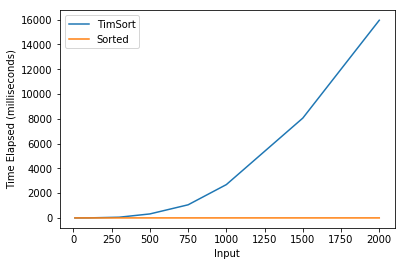

In [21]:
ax = df5.plot(x='Input', y=['TimSort', 'Sorted'])
ax.set_ylabel("Time Elapsed (milliseconds)");

TimSort is performing nowhere near as well as expected and I am now convinced there is an error in the code implementing this algorithm. TimSort is performing worse than Bubble Sort on a similar input size. 